Load 📈`tidymodels` and the 🐧`palmerpenguins` packages

In [2]:
library("tidyverse")
library("tidymodels")
library("palmerpenguins")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Let's model penguin bill length using bill depth and penguin species as explanatory variables.

First we need to prepare our training data for the model. We can use a `tidymodels` recipe for this...

Create a `recipe` that dummy encodes the `species` variable. Make sure to "prep" your recipe. Use `juice` and `glimpse` to inspect your training data.


In [3]:
# Hint the initial formula will be bill_length_mm ~ bill_depth_mm + species

rec <- recipe(bill_depth_mm ~ bill_length_mm + species, data = penguins) |>
  step_naomit(everything()) |>
  step_dummy(species) |>
  prep()

rec |> juice() |> glimpse()

Rows: 342
Columns: 4
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34.1, 42.0…
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2…
$ species_Chinstrap <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ species_Gentoo    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


Now let's build train a linear model with our data from above

In [4]:
# Hint the formula will be bill_length_mm ~ .
rec_prepped <- prep(rec, penguins)
mod <- linear_reg() |> set_engine("lm")
mod_fit <- mod |> fit(bill_length_mm ~ ., data = juice(rec))
tidy(mod_fit)

Warning message in prep(rec, penguins):
"! The previous data will be used by `prep()`.
ℹ The data passed using `training` will be ignored."


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),13.216370,2.2475424,5.880365,9.834290e-09
bill_depth_mm,1.394011,0.1219961,11.426679,8.661124e-26
species_Chinstrap,9.938955,0.3677851,27.023812,1.810788e-86
species_Gentoo,13.403279,0.5118140,26.187795,2.421386e-83


Use the `tidy` function to report the model parameters.

In [5]:
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),13.216370,2.2475424,5.880365,9.834290e-09
bill_depth_mm,1.394011,0.1219961,11.426679,8.661124e-26
species_Chinstrap,9.938955,0.3677851,27.023812,1.810788e-86
species_Gentoo,13.403279,0.5118140,26.187795,2.421386e-83


Run the code below to visualize the model.

Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`)."


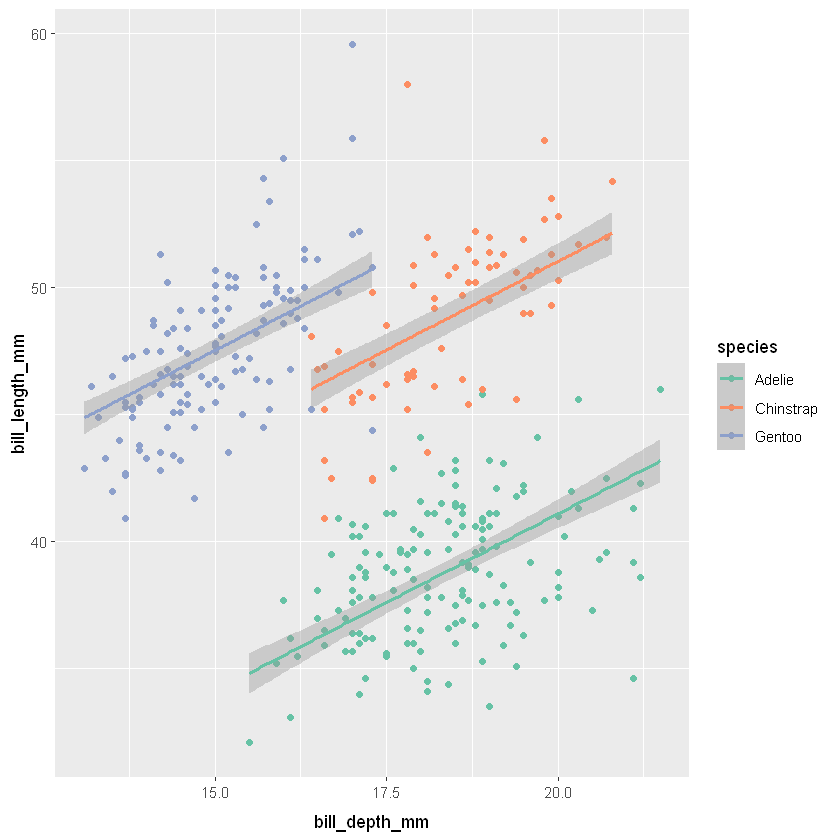

In [7]:
p <- ggplot(penguins, aes(x = bill_depth_mm, y = bill_length_mm, color = species)) +
  geom_point(na.rm = T) +
  scale_color_brewer(palette = 'Set2') +
  # geom_smooth(method = "lm")
  moderndive::geom_parallel_slopes()

p

Copy your cell from above with your "recipe" code and paste it below. **Add a step to make an interaction variable (use `step_interact(~ bill_depth_mm:starts_with("species"))`)** 

In [12]:
p <- ggplot(penguins, aes(x = bill_depth_mm, y = bill_length_mm, color = species)) +
  geom_point(na.rm = T) +
  scale_color_brewer(palette = 'Set2') +
  # geom_smooth(method = "lm")
  step_interact(~ bill_depth_mm:starts_with("species")) +
  moderndive::geom_parallel_slopes()


ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `step_interact(~bill_depth_mm:starts_with("species"))` to a
  [34m<ggplot>[39m object.


Build your model with the interaction variable.

Visualize the model with the following code:

In [ ]:
p = ggplot(penguins, aes(x = bill_depth_mm, y = bill_length_mm, color = species)) +
    geom_point(na.rm = T) +
    scale_color_brewer(palette = 'Set2') +
    geom_smooth(method = "lm")
    # moderndive::geom_parallel_slopes()

p

Which model do you prefer?

You can use glance to find some model metrics. E.g.

```r
glance(mod_fit)
```

How do the models compare with respect to adjusted coefficient of determination?